In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

# Carga del dataset

Fuente: https://www.datos.gov.co/Organismos-de-Control/Poblaci-n-Sistema-Subsidio-Familiar-Marzo-2018/gn7q-qsmp

In [3]:
subsidio_mar_2018_df = pd.read_csv( './data/subsidio_familiar_mar_2018.csv' )
subsidio_feb_2018_df = pd.read_csv( './data/subsidio_familiar_mar_2018.csv' )
subsidio_ene_2018_df = pd.read_csv( './data/subsidio_familiar_mar_2018.csv' )
subsidio_dic_2017_df = pd.read_csv( './data/subsidio_familiar_dic_2017.csv' )
subsidio_nov_2017_df = pd.read_csv( './data/subsidio_familiar_nov_2017.csv' )
subsidio_oct_2017_df = pd.read_csv( './data/subsidio_familiar_oct_2017.csv' )
subsidio_sep_2017_df = pd.read_csv( './data/subsidio_familiar_sep_2017.csv' )
subsidio_ago_2017_df = pd.read_csv( './data/subsidio_familiar_ago_2017.csv' )
subsidio_jul_2017_df = pd.read_csv( './data/subsidio_familiar_jul_2017.csv' )
subsidio_jun_2017_df = pd.read_csv( './data/subsidio_familiar_jun_2017.csv' )
subsidio_may_2017_df = pd.read_csv( './data/subsidio_familiar_may_2017.csv' )
subsidio_abr_2017_df = pd.read_csv( './data/subsidio_familiar_abr_2017.csv' )
subsidio_mar_2017_df = pd.read_csv( './data/subsidio_familiar_mar_2017.csv' )
subsidio_feb_2017_df = pd.read_csv( './data/subsidio_familiar_feb_2017.csv' )
subsidio_ene_2017_df = pd.read_csv( './data/subsidio_familiar_ene_2017.csv' )

In [4]:
print( subsidio_mar_2018_df.shape )
print( subsidio_feb_2018_df.shape )
print( subsidio_ene_2018_df.shape )
print( subsidio_dic_2017_df.shape )
print( subsidio_nov_2017_df.shape )
print( subsidio_oct_2017_df.shape )
print( subsidio_sep_2017_df.shape )
print( subsidio_ago_2017_df.shape )
print( subsidio_jul_2017_df.shape )
print( subsidio_jun_2017_df.shape )
print( subsidio_may_2017_df.shape )
print( subsidio_abr_2017_df.shape )
print( subsidio_mar_2017_df.shape )
print( subsidio_feb_2017_df.shape )
print( subsidio_ene_2017_df.shape )

(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)
(43, 11)


In [5]:
subsidio_mar_2018_df[ 'Periodo' ] = 201803
subsidio_feb_2018_df[ 'Periodo' ] = 201802
subsidio_ene_2018_df[ 'Periodo' ] = 201801
subsidio_dic_2017_df[ 'Periodo' ] = 201712
subsidio_nov_2017_df[ 'Periodo' ] = 201711
subsidio_oct_2017_df[ 'Periodo' ] = 201710
subsidio_sep_2017_df[ 'Periodo' ] = 201709
subsidio_ago_2017_df[ 'Periodo' ] = 201708
subsidio_jul_2017_df[ 'Periodo' ] = 201707
subsidio_jun_2017_df[ 'Periodo' ] = 201706
subsidio_may_2017_df[ 'Periodo' ] = 201705
subsidio_abr_2017_df[ 'Periodo' ] = 201704
subsidio_mar_2017_df[ 'Periodo' ] = 201703
subsidio_feb_2017_df[ 'Periodo' ] = 201702
subsidio_ene_2017_df[ 'Periodo' ] = 201701

In [6]:
subsidio_df = pd.concat( [ subsidio_mar_2018_df, subsidio_feb_2018_df, subsidio_ene_2018_df, subsidio_dic_2017_df, subsidio_nov_2017_df, subsidio_oct_2017_df, subsidio_sep_2017_df, subsidio_ago_2017_df, subsidio_jul_2017_df, subsidio_jun_2017_df, subsidio_may_2017_df, subsidio_abr_2017_df, subsidio_mar_2017_df, subsidio_feb_2017_df, subsidio_ene_2017_df ] )

In [7]:
subsidio_df.shape

(645, 12)

In [8]:
subsidio_df.dtypes

Código                                          int64
CCF                                            object
Empresas Afiliadas                              int64
Total Afiliados Cajas Compensacion Familiar     int64
Trabajadores Afiliados Dependientes             int64
Afiliados Facultativos Independientes           int64
Afiliados Pensionados                           int64
Afiliados Fidelidad                             int64
No Afiliados con Derecho a Subsidio             int64
Personas Cargo                                  int64
Total Población Cubierta                        int64
Periodo                                         int64
dtype: object

In [9]:
subsidio_df.head()

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,Periodo
0,2,Caja de Compensacion Familiar Camacol COMFAMIL...,1236,19966,19912,54,0,0,0,29200,49166,201803
1,3,Caja de Compensacion Familiar COMFENALCO ANTIO...,19358,406702,393749,6930,1773,154,4096,460782,867484,201803
2,4,Caja de Compensacion Familiar de Antioquia COM...,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257,201803
3,5,Caja de Compensación Familiar CAJACOPI BARRANQ...,2973,52635,52098,122,48,0,367,94472,147107,201803
4,6,Caja de Compensacion Familiar de Barranquilla ...,10245,151014,146866,816,220,0,3112,195078,346092,201803


# Extracción de características

In [12]:
X = subsidio_df[ subsidio_df.columns.tolist()[ 2:-1 ] ]

In [13]:
X.head()

,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta
0,1236,19966,19912,54,0,0,0,29200,49166
1,19358,406702,393749,6930,1773,154,4096,460782,867484
2,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257
3,2973,52635,52098,122,48,0,367,94472,147107
4,10245,151014,146866,816,220,0,3112,195078,346092


# Construcción del modelo de clustering

In [20]:
# Número de clusters
n_clusters = 5

In [21]:
# Se crea el modelo de clustering
model = KMeans( n_clusters = n_clusters )

In [22]:
# Ajuste del modelo a los datos
clusters = model.fit_predict( X )

In [23]:
# Crea una nueva columna en el dataframe con el cluster asignado a cada dato
subsidio_df[ 'cluster' ] = clusters

In [24]:
subsidio_df.head()

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,Periodo,cluster
0,2,Caja de Compensacion Familiar Camacol COMFAMIL...,1236,19966,19912,54,0,0,0,29200,49166,201803,0
1,3,Caja de Compensacion Familiar COMFENALCO ANTIO...,19358,406702,393749,6930,1773,154,4096,460782,867484,201803,2
2,4,Caja de Compensacion Familiar de Antioquia COM...,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257,201803,1
3,5,Caja de Compensación Familiar CAJACOPI BARRANQ...,2973,52635,52098,122,48,0,367,94472,147107,201803,0
4,6,Caja de Compensacion Familiar de Barranquilla ...,10245,151014,146866,816,220,0,3112,195078,346092,201803,2


# Evaluación del modelo

In [25]:
subsidio_df[ 'cluster' ].value_counts()

0    360
2    210
4     31
1     30
3     14
Name: cluster, dtype: int64

In [26]:
# Calcula el valor de silueta promedio de todos los clusters
silhouette_avg = silhouette_score( X, clusters )
silhouette_avg

0.6105762933751284

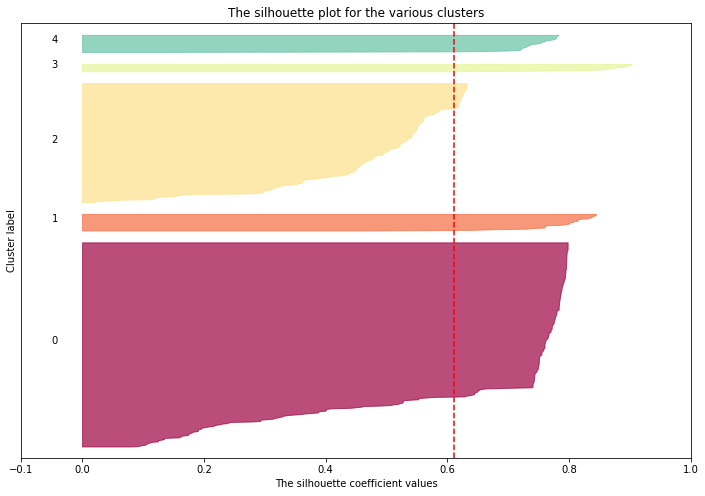

In [27]:
fig, ( ax1 ) = plt.subplots( 1, 1 )
fig.set_size_inches( 12, 8 )

ax1.set_xlim( [ -0.1, 1 ] )
ax1.set_ylim( [ 0, len( X ) + ( n_clusters + 1 ) * 20 ] )

# Calcula el valor de silueta para cada dato
sample_silhouette_values = silhouette_samples( X, clusters )

y_lower = 20
for i in range( n_clusters ):
    ith_cluster_silhouette_values = sample_silhouette_values[ clusters == i ]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[ 0 ]
    y_upper = y_lower + size_cluster_i

    color = cm.get_cmap("Spectral")( float( i ) / n_clusters )
    ax1.fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7 )

    ax1.text( -0.05, y_lower + 0.5 * size_cluster_i, str( i ) )

    y_lower = y_upper + 20

ax1.set_title( 'The silhouette plot for the various clusters' )
ax1.set_xlabel( 'The silhouette coefficient values' )
ax1.set_ylabel( 'Cluster label' )

ax1.axvline( x = silhouette_avg, color = 'red', linestyle = '--' )

ax1.set_yticks( [] )
ax1.set_xticks( [ -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1 ] )

# Explicación de los clusters

In [28]:
subsidio_df.loc[ subsidio_df[ 'Código' ] == 22 ]

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,Periodo,cluster
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,86148,1661100,1612281,18431,9783,7341,13264,1793941,3455041,201803,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,86148,1661100,1612281,18431,9783,7341,13264,1793941,3455041,201802,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,86148,1661100,1612281,18431,9783,7341,13264,1793941,3455041,201801,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,83543,1688375,1639462,17520,9656,7172,14565,1797591,3485966,201712,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,83043,1719743,1674658,17341,9360,7132,11252,1831247,3550990,201711,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,82406,1697978,1651413,16801,9512,7037,13215,1825924,3523902,201710,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,81754,1707800,1661588,16975,9568,7051,12618,1827025,3534825,201709,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,80963,1695543,1652324,16564,9492,6989,10174,1781669,3477212,201708,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,80295,1675462,1628737,16248,9475,6940,14062,1756956,3432418,201707,3
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,79567,1661935,1620318,15835,9250,6838,9694,0,1661935,201706,4
